### Genetic algorithms can be used for linear regression. 

Model parameters (intercept and slope coefficients) 
are represented as strings of binary digits called chromosomes. 

These chromosomes are then subjected to genetic operations such as crossover and mutation to create new generations of potential solutions. 

The fitness of each solution is evaluated based on its ability to minimize the error between the predicted values and the actual values of the dependent variable.

The genetic algorithm iteratively searches for the best combination of model parameters until a stopping criteria is met, such as the desired level of accuracy being achieved or a maximum number of iterations being reached.

Overall, using a genetic algorithm for linear regression can be a powerful tool for finding the optimal parameters of a linear regression model, especially in cases where the dataset is large, or the number of possible parameter combinations is very large.

Below is an example Python code demonstrating the use of genetic algorithm to solve linear regression problem:

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define the genetic algorithm parameters
POPULATION_SIZE = 100
MUTATION_RATE = 0.1
GENERATIONS = 50

In [3]:
# Define the linear regression function
def linear_regression(x, w):
    y = np.dot(x, w[:-1]) + w[-1]
    return y

# Define the fitness function
def fitness_function(x, y, w):
    y_pred = linear_regression(x, w)
    mse = np.mean(np.square(y - y_pred))
    fitness = 1 / (mse + 1e-6)
    return fitness

# Initialize the population
def init_population(population_size, chromosome_length):
    population = []
    for i in range(population_size):
        chromosome = np.random.uniform(-1, 1, chromosome_length)
        population.append(chromosome)
    return population

# Perform selection using tournament selection
def selection(population, fitness_scores):
    selected = []
    for i in range(len(population)):
        competitors = np.random.choice(len(population), 2, replace=False)
        fitness1, fitness2 = fitness_scores[competitors[0]], fitness_scores[competitors[1]]
        if fitness1 > fitness2:
            selected.append(population[competitors[0]])
        else:
            selected.append(population[competitors[1]])
    return selected

# Perform crossover using single point crossover
def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Perform mutation
def mutation(chromosome, mutation_rate):
    for i in range(len(chromosome)):
        if random.random() < mutation_rate:
            chromosome[i] = np.random.uniform(-1, 1)
    return chromosome

# Genetic algorithm main function
def genetic_algorithm(x, y, population_size, mutation_rate, generations):
    chromosome_length = x.shape[1] + 1
    population = init_population(population_size, chromosome_length)
    best_fitnesses = []
    best_chromosomes = []
    for generation in range(generations):
        fitness_scores = [fitness_function(x, y, chromosome) for chromosome in population]
        best_fitness = max(fitness_scores)
        best_index = np.argmax(fitness_scores)
        best_chromosome = population[best_index]
        best_fitnesses.append(best_fitness)
        best_chromosomes.append(best_chromosome)
        selected = selection(population, fitness_scores)
        offspring = []
        for i in range(0, population_size, 2):
            parent1, parent2 = selected[i], selected[i+1]
            child1, child2 = crossover(parent1, parent2)
            child1 = mutation(child1, mutation_rate)
            child2 = mutation(child2, mutation_rate)
            offspring.append(child1)
            offspring.append(child2)
        population = offspring
    return best_chromosome, best_fitnesses, best_chromosomes

In [4]:
# Generate 5 numeric features 
# 100 rows, 5 numeric columns with values in range [-1,1]
x = np.random.uniform(-1, 1, (100, 5))
print(x.shape)
print(x[:3,:])
print("...")

(100, 5)
[[-0.09169932 -0.61669349 -0.73623049  0.56201084 -0.94099707]
 [-0.63991     0.62730765  0.1296794  -0.83526945 -0.31403823]
 [-0.02149491 -0.45495555  0.86932204  0.18898398  0.50011022]]
...


In [5]:
# Generate TRUE weights
w_true = np.random.uniform(-1, 1, 6)
print(w_true.shape)
print(w_true)

(6,)
[-0.70206382 -0.84564808 -0.07902739  0.38329168 -0.62096893  0.42197337]


In [6]:
# Calculate the target "y" column from the data "x"
# using linear regressin model with coefficients "w_true"
y = linear_regression(x, w_true)
print(y.shape)
print(y[:5])

(100,)
[ 1.86578421  0.20535745  0.51497927  0.24736826 -0.14990502]


In [7]:
# Apply the genetic algorithm to calculate predicted weights
w_pred, best_fitnesses, best_chromosomes = genetic_algorithm( \
             x, y, POPULATION_SIZE, MUTATION_RATE, GENERATIONS)

In [8]:
# Print the true and predicted weights
df = pd.DataFrame({"true":w_true, "pred": w_pred})
print("Weights:")
display(df)

Weights:


,true,pred
0,-0.702064,-0.720849
1,-0.845648,-0.855157
2,-0.079027,-0.083557
3,0.383292,0.376993
4,-0.620969,-0.608215
5,0.421973,0.404806


In [9]:
# Evaluate the performance of the predicted weights
y_pred = linear_regression(x, np.append(w_pred[:-1], [w_pred[-1]]))
mse = np.mean(np.square(y - y_pred))
print(f"Mean Squared Error = {mse:.4f}")

Mean Squared Error = 0.0005


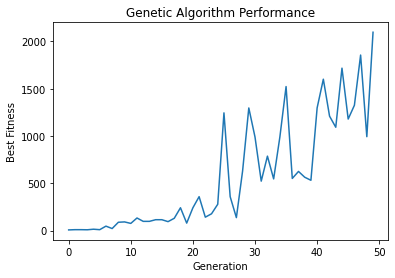

In [10]:
# Plot the best fitnesses over generations
plt.plot(best_fitnesses)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Genetic Algorithm Performance')
plt.show()

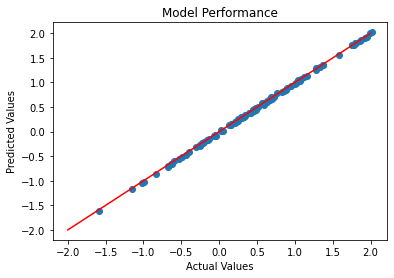

In [11]:
# Plot the actual data and the predicted values
plt.scatter(y, y_pred)
plt.plot([-2, 2], [-2, 2], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Performance')
plt.show()